In [1]:
import numpy as np
from matplotlib import pyplot as plt
from juliacall import Main as jl


In [2]:
# Activate the Julia environment of the current
# directory.
jl.Pkg.activate('.')

# Run the Julia script to load the Biot-Savart
# function.
# jl.include('julia_src/biot_savart.jl')  # CPU version
jl.include('julia_src/biot_savart_cuda.jl')  # GPU version

Max number of thread: 1024
Register usage: 61
Memory usage: (local = 208, shared = 0, constant = 0)


  Activating project at `~/Dropbox/code/vorpy`


bs_solve (generic function with 1 method)

Shape of fps: (100, 3)


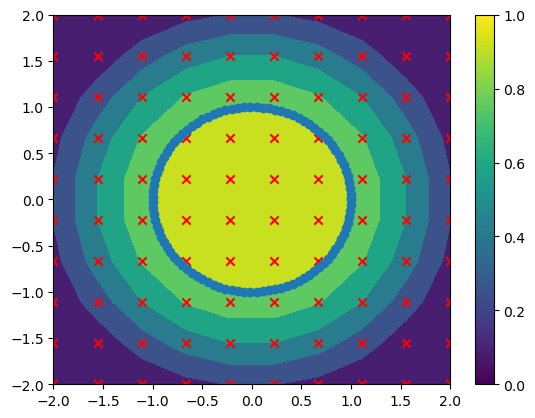

In [5]:
#############################################
# Generate a vortex (points, core radii, and
# circulation)and field pioints.
#############################################

NUMSEGS = 100
VRADIUS = 1
NUMFP = 10

# Generate the vortex points.
# x = r * cos(theta)
# y = r * sin(theta)
theta = np.linspace(0, 2 * np.pi, NUMSEGS)
vpx = VRADIUS * np.cos(theta)
vpy = VRADIUS * np.sin(theta)
vpz = np.zeros_like(vpx)
vpps = np.concatenate([vpx[:, np.newaxis], vpy[:, np.newaxis], vpz[:, np.newaxis]], axis=1)

# Generate the core radii.
vcrds = np.ones(NUMSEGS+1) * 1.0

# Generate the circulation.
vcirs = np.ones(NUMSEGS+1) * 1.0

# Plot the vortex points.
# REPLACE WITH MUVI METHOD THAT USES THE CORE
# RADIUS TO DETERMINE SIZE OF VORTEX TUBE AND
# COLOR TO DEPICT CIRCULATION.
# plt.plot(vpx, vpy, 'o-')
# plt.scatter([0], [0], marker='x', color='r')
# plt.show()

# Generate the field points.
x = np.linspace(-2, 2, NUMFP)
y = np.linspace(-2, 2, NUMFP)
# z = np.linspace(-2, 2, NUMFP)
# z = np.zeros_like(x)
z = np.array([0])
mgx, mgy, mgz = np.meshgrid(x, y, z)
fps = np.concatenate([mgx.flatten()[:, np.newaxis], mgy.flatten()[:, np.newaxis], mgz.flatten()[:, np.newaxis]], axis=1)
print('Shape of fps:', fps.shape)
# plt.scatter(fps[:, 0], fps[:, 1], marker='x', color='r')
# plt.show()

vel_num = np.transpose(jl.bs_solve(fps.T, vpps.T, vcrds, vcirs))
# plt.imshow(vel_num[:, 2].reshape(NUMFP, NUMFP))
levels = np.linspace(np.min(vel_num[:, 2]), np.max(vel_num[:, 2]), 7)
plt.contourf(mgx[:, :, 0], mgy[:, :, 0], vel_num[:, 2].reshape(NUMFP, NUMFP), levels=levels)
plt.plot(vpx, vpy, 'o-')
plt.scatter(fps[:, 0], fps[:, 1], marker='x', color='r')
plt.colorbar()
plt.show()